<a href="https://colab.research.google.com/github/orkungokbulut/Breast-Cancer-Detection-Using-Python-Machine-Learning/blob/main/src.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Importing dataset
from google.colab import files 
upladed = files.upload()
df = pd.read_csv('data.csv')
df.head(7)


Saving data.csv to data (1).csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN


In [6]:
#Number of rows and columns 
df.shape

(569, 33)

In [7]:
#Determining the null (NaN, NAN, na) columns
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
#Deleting emty columns
df = df.dropna(axis=1)

In [9]:
df.shape

(569, 32)

In [10]:
#Benign(B) and Malignant(M) cells
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


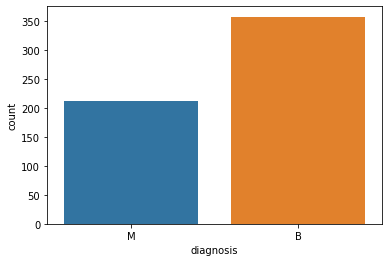

In [11]:
#Chart of cell types
sns.countplot(df['diagnosis'], label = 'count')

In [12]:
#Data types
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [13]:
#Changing categorical datas to 1 and 0, 1 for malignant 0 for benign
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,1] = labelencoder_Y.fit_transform(df.iloc[:,1].values)


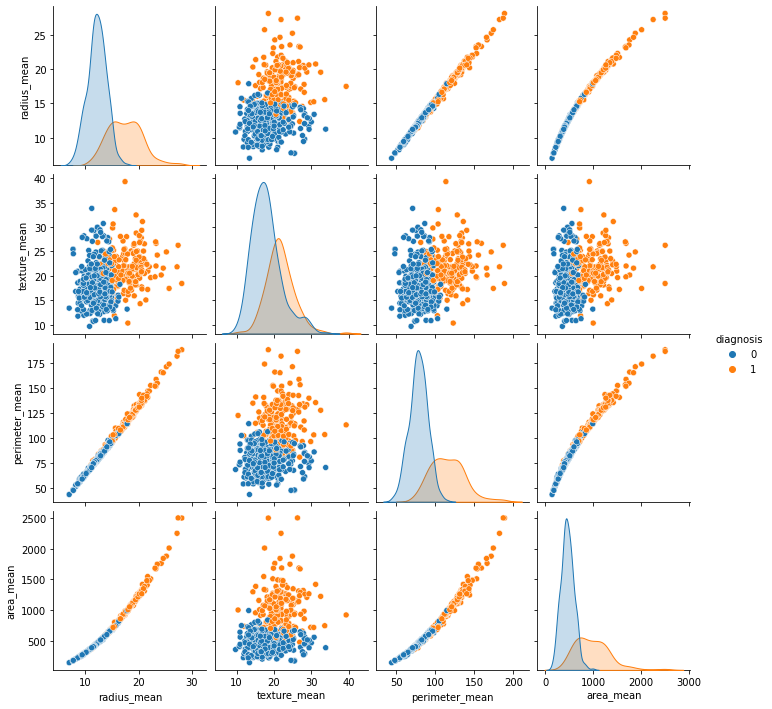

In [14]:
#More visualization
sns.pairplot(df.iloc[:,1:6], hue = 'diagnosis')


In [15]:
#First 5 rows of modified dataset
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
#Determining the correlation values of columns
df.iloc[:,1:12].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


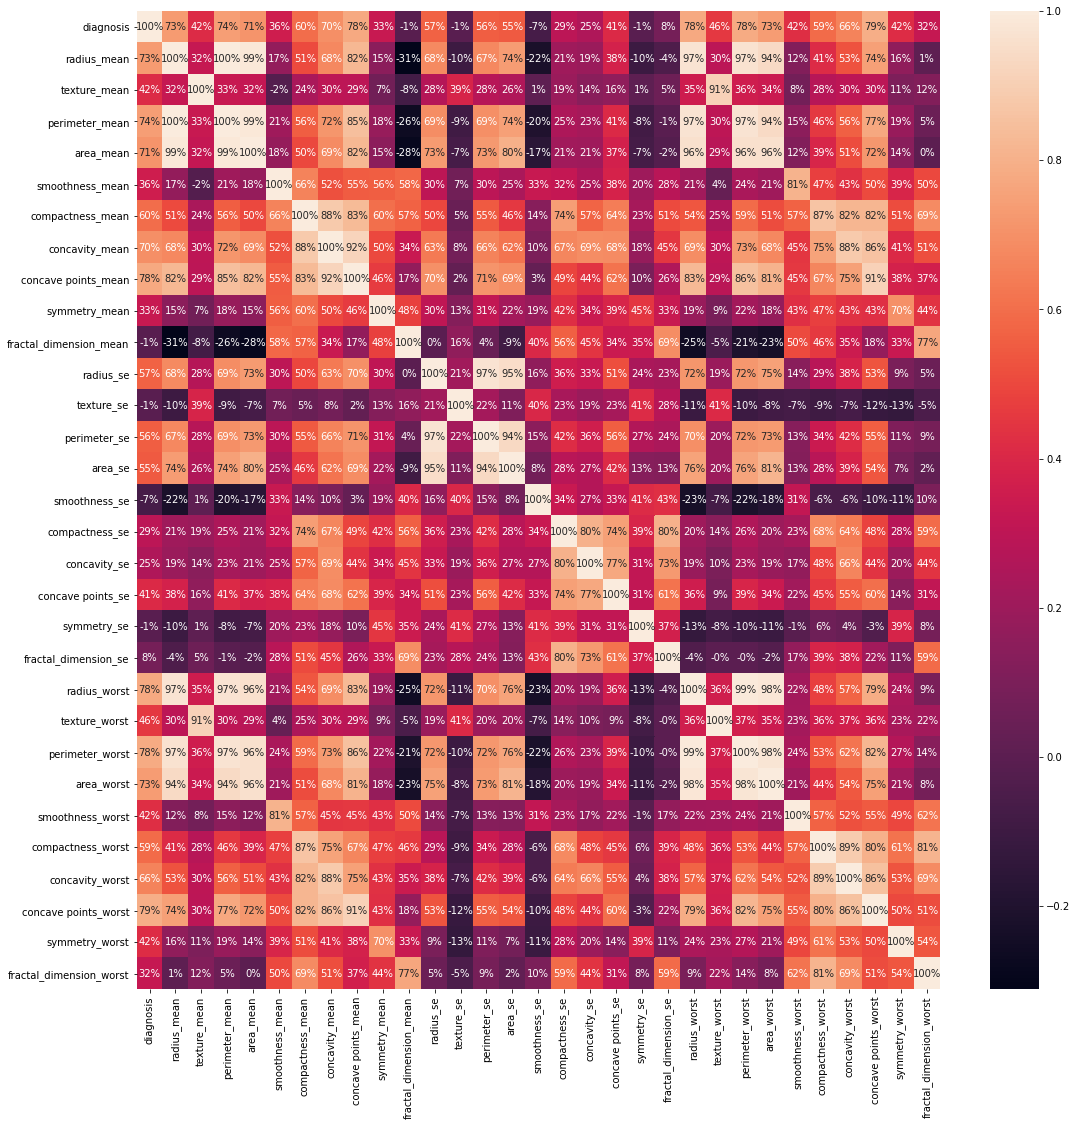

In [17]:
#Visualization of correlation
plt.figure(figsize=(18, 18))
sns.heatmap(df.iloc[:,1:32].corr(), annot=True, fmt='.0%')

In [18]:

X = df.iloc[:,2:31].values
Y = df.iloc[:,1].values

In [19]:
#Splitting dataset for %75 training and %25 test 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [20]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [21]:
 
def models(X_train, Y_train):

  #Lojistic Regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)

  #Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Random Forest Classifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)

  #SVM Classifier
  from sklearn.svm import SVC
  svm = SVC(probability = True)
  svm.fit(X_train, Y_train)

  #Naive Bayes
  from sklearn.naive_bayes import GaussianNB
  naive = GaussianNB()
  naive.fit(X_train, Y_train)

  #KNN
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #K-Means
  from sklearn.cluster import KMeans
  kmeans = KMeans(n_clusters = 2, random_state = 0)
  kmeans.fit(X_train)

  #Accuracy rates of algorithms
  print('[0] Logistic Regression Training Accuracy: ', log.score(X_train, Y_train))
  print('[1] Decision Tree Training Accuracy: ', tree.score(X_train, Y_train))
  print('[2] Random Forest Training Accuracy: ', forest.score(X_train, Y_train))
  print('[3] SVM Training Accuracy: ', svm.score(X_train, Y_train))
  print('[4] Naive Bayes Training Accuracy: ', naive.score(X_train, Y_train))
  print('[5] KNN Training Accuracy: ', knn.score(X_train, Y_train))
  print('[6] KMeans Training Accuracy: ', kmeans.score(X_train, Y_train))

  return log, tree, forest, svm, naive, knn, kmeans


In [22]:
#Bütün modellerin alınması
model = models(X_train, Y_train)


[0] Logistic Regression Training Accuracy:  0.9906103286384976
[1] Decision Tree Training Accuracy:  1.0
[2] Random Forest Training Accuracy:  0.9953051643192489
[3] SVM Training Accuracy:  0.9835680751173709
[4] Naive Bayes Training Accuracy:  0.9507042253521126
[5] KNN Training Accuracy:  0.9765258215962441
[6] KMeans Training Accuracy:  -8389.986871803652


In [23]:
#Testing models over confusion matrix
from sklearn.metrics import confusion_matrix
for i in range (len(model)):
  print('Model ', i)
  cm = confusion_matrix(Y_test, model[i].predict(X_test))

  TP = cm[0][0]
  TN = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]
  accuracy = (TP+TN)/ (TP + TN + FN + FP)
  recall = (TP)/ (TP + FN)
  precision = (TP)/ (TP + FP)

  print("Confusion Matrix: \n", cm)
  print()
  print('Test Accuracy =', accuracy)
  print ('Precision     =', precision)
  print('Recall        =', recall)
  print ('F1 Score      =', 2*(precision*recall) / (precision + recall))
  print('-------------------------------------')

Model  0
Confusion Matrix: 
 [[86  4]
 [ 3 50]]

Test Accuracy = 0.951048951048951
Precision     = 0.9555555555555556
Recall        = 0.9662921348314607
F1 Score      = 0.9608938547486034
-------------------------------------
Model  1
Confusion Matrix: 
 [[83  7]
 [ 2 51]]

Test Accuracy = 0.9370629370629371
Precision     = 0.9222222222222223
Recall        = 0.9764705882352941
F1 Score      = 0.9485714285714287
-------------------------------------
Model  2
Confusion Matrix: 
 [[87  3]
 [ 2 51]]

Test Accuracy = 0.965034965034965
Precision     = 0.9666666666666667
Recall        = 0.9775280898876404
F1 Score      = 0.9720670391061451
-------------------------------------
Model  3
Confusion Matrix: 
 [[88  2]
 [ 3 50]]

Test Accuracy = 0.965034965034965
Precision     = 0.9777777777777777
Recall        = 0.967032967032967
F1 Score      = 0.9723756906077348
-------------------------------------
Model  4
Confusion Matrix: 
 [[87  3]
 [ 5 48]]

Test Accuracy = 0.9440559440559441
Precision   

In [24]:
#Another way to calculate metrics of models
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range (len(model)):
  print('Model ',i )
  print(classification_report(Y_test, model[i].predict(X_test)))
  print('Accuracy = ', accuracy_score(Y_test, model[i].predict(X_test)))
  print("\n")

Model  0
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        90
           1       0.93      0.94      0.93        53

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

Accuracy =  0.951048951048951


Model  1
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        90
           1       0.88      0.96      0.92        53

    accuracy                           0.94       143
   macro avg       0.93      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143

Accuracy =  0.9370629370629371


Model  2
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        90
           1       0.94      0.96      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96   

In [27]:
#K-means agorithm's predictions
pred = model[6].predict(X_test)
print('K-Means algorithms predictions:\n', pred)
print()
print('Actual data: \n', Y_test)

K-Means algorithms predictions:
 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1]

Actual data: 
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]


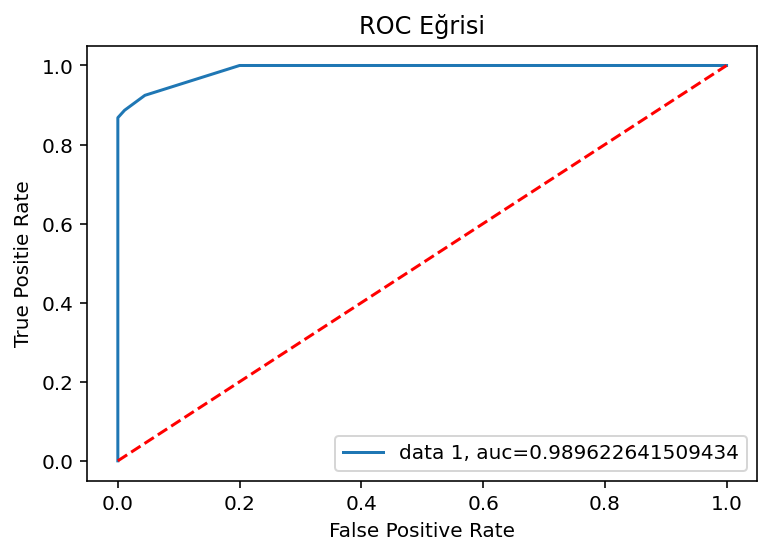

In [ ]:
#ROC Curve
import sklearn.metrics as metrics

y_pred_proba = model[5].predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.title('ROC Eğrisi')
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positie Rate')
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=4)
plt.show()

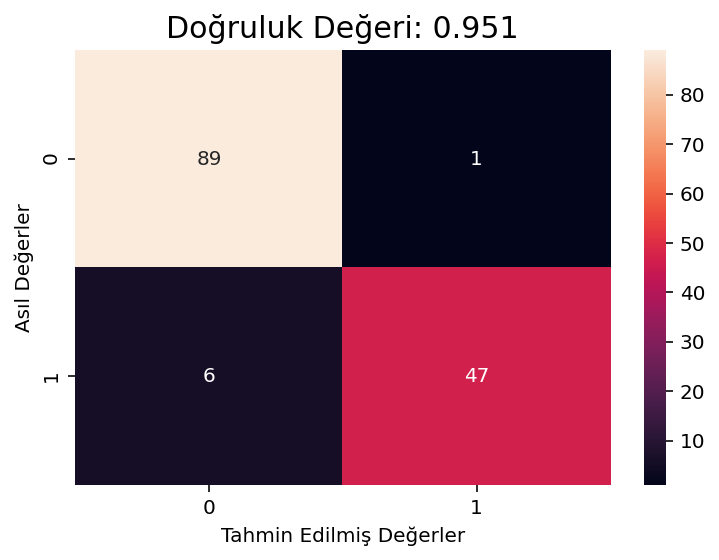

In [ ]:
#Visualization of confusion matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as cm

predictions = model[6].predict(X_test)
score = round(accuracy_score(Y_test, predictions), 3)
cm1 = cm(Y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Tahmin Edilmiş Değerler')
plt.ylabel('Asıl Değerler')
plt.title('Doğruluk Değeri: {0}'.format(score), size = 15)
plt.show()


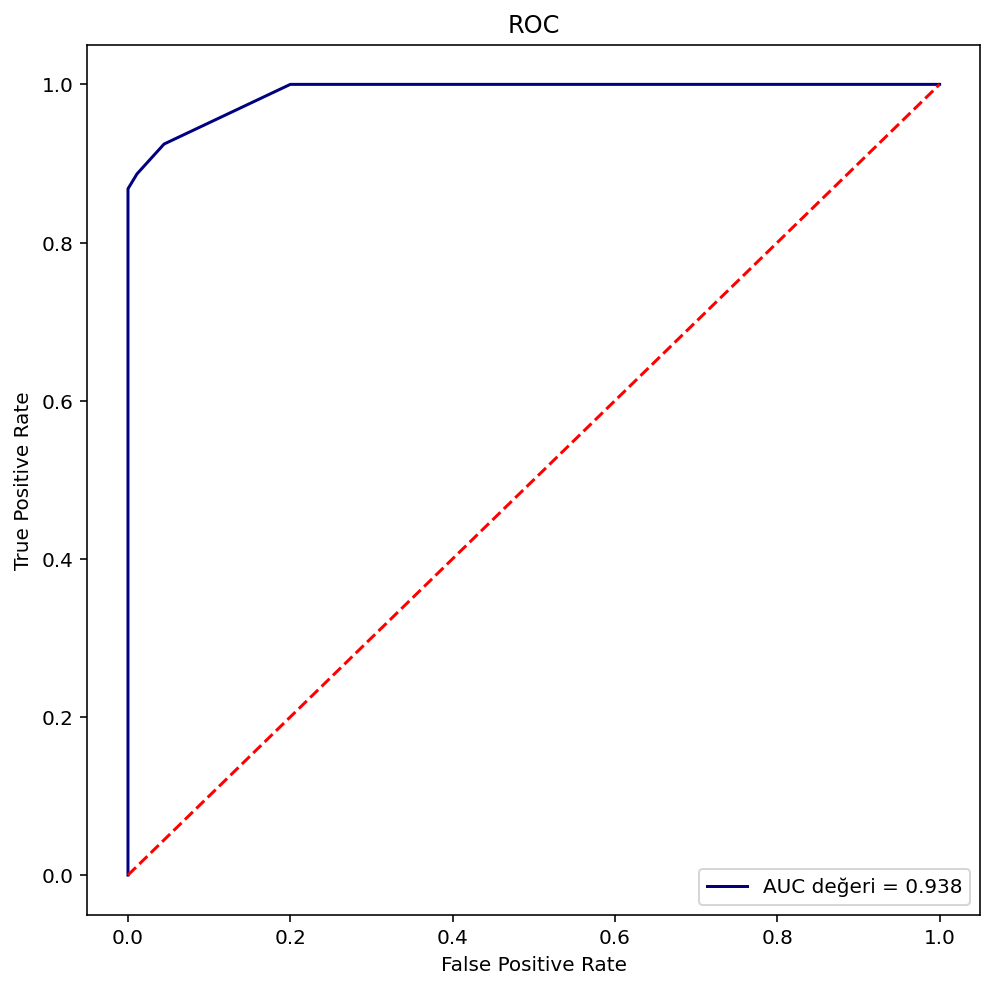

0.9378406708595388


In [ ]:
#Bigger ROC curve
plt.figure(figsize=(8,8))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

roc_auc = roc_auc_score(Y_test, model[5].predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, model[5].predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='AUC değeri = %0.3f' % roc_auc, color='navy')
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()
print(roc_auc)

In [28]:
#Principle Component Analysis
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

scaled_data = scaler.transform(df)
scaled_data

from sklearn.decomposition import PCA

pca = PCA(n_components= 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data) 

print("Scaled data size:", scaled_data.shape)
print("Scaled data vector:\n\n",scaled_data)
print("-------------------------------------\n")
print("PCA applied data size:", x_pca.shape)
print("PCA applied data vector:\n\n", x_pca)




Scaled data size: (569, 32)
Scaled data vector:

 [[-0.23640517  1.29767572  1.09706398 ...  2.29607613  2.75062224
   1.93701461]
 [-0.23640344  1.29767572  1.82982061 ...  1.0870843  -0.24388967
   0.28118999]
 [ 0.43174109  1.29767572  1.57988811 ...  1.95500035  1.152255
   0.20139121]
 ...
 [-0.23572747  1.29767572  0.70228425 ...  0.41406869 -1.10454895
  -0.31840916]
 [-0.23572517  1.29767572  1.83834103 ...  2.28998549  1.91908301
   2.21963528]
 [-0.24240586 -0.77060855 -1.80840125 ... -1.74506282 -0.04813821
  -0.75120669]]
-------------------------------------

PCA applied data size: (569, 2)
PCA applied data vector:

 [[ 9.21672415  2.13674957]
 [ 2.65124379 -3.77074095]
 [ 5.90069721 -1.01091626]
 ...
 [ 1.5257542  -1.95055191]
 [10.39583236  1.87122919]
 [-5.50787608 -0.76780509]]


Text(0, 0.5, 'second essential ingredient')

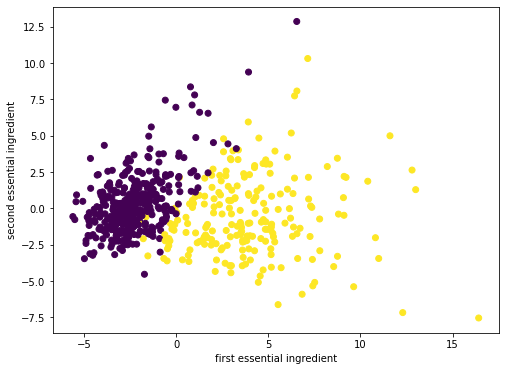

In [29]:
#PCA applied 2D data visualization purple for malignant, yellow for benign
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = df['diagnosis'])
plt.xlabel('First essential ingredient')
plt.ylabel('Second essential ingredient')


In [30]:
import numpy as np 
import pandas as pd
from sklearn.decomposition import PCA



In [31]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
X, y = load_breast_cancer(return_X_y = True)

print("Features {}".format(X.shape))
print("Target {}".format(y.shape))
dataset.feature_names

Features (569, 30)
Target (569,)


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
#Principal Componene Analysis

#Reading data
dataset = load_breast_cancer()
X, y = load_breast_cancer(return_X_y = True)
#Normalize
sc = StandardScaler()
X_normalized = sc.fit_transform(X)
#Applying PCS
pca = PCA(n_components = 2).fit(X_normalized)
pca_X = pca.transform(X_normalized)

pca_X.shape

(569, 2)

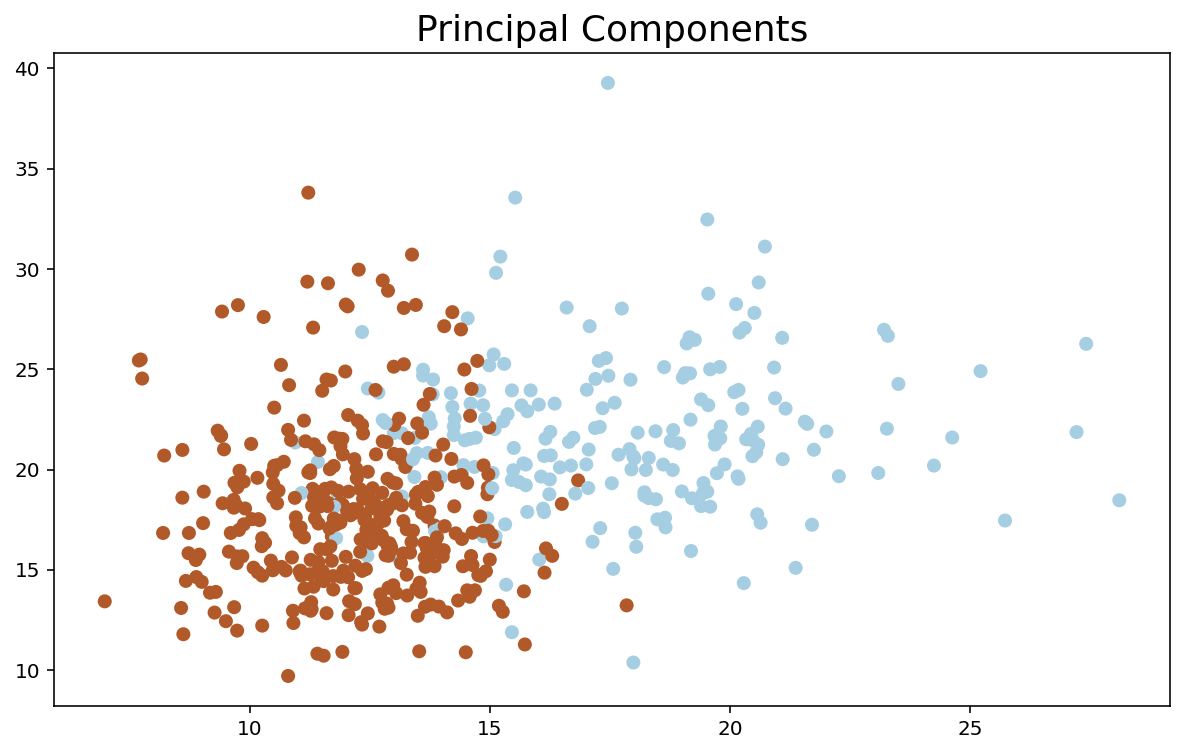

In [ ]:
#Visualization of data that applied PCA
#One class is represented by brown and the other by blue. Although there is some overlap, we seem to be able to seperate well with the main components. It is important to note that we represent 30 features with 2 features.
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
plt.title("Principal Components", fontsize=18)
plt.scatter(X[:,0], X[:,1], c=y, cmap='Paired')

In [ ]:
#%75 training, %25 test 
X_train, X_test, Y_train, Y_test = train_test_split(pca_X, Y, test_size = 0.25, random_state = 0)

In [32]:
#Application of the same classification models using main components. We will try to predict target variables with 2 features instead of 30.

def models(X_train, Y_train):
  #Lojistik Regresyon
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)

  #Karar Ağacı
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Random Forest
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)

  #SVM Classifier
  from sklearn.svm import SVC
  svm = SVC(probability = True)
  svm.fit(X_train, Y_train)

  #Naive Bayes
  from sklearn.naive_bayes import GaussianNB
  naive = GaussianNB()
  naive.fit(X_train, Y_train)

  #KNN
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #K-Means
  from sklearn.cluster import KMeans
  kmeans = KMeans(n_clusters = 2, random_state = 0)
  kmeans.fit(X_train, Y_train)


  #Modellerin Accuracy oranları
  print('[0] Logistic Regression Training Accuracy: ', log.score(X_train, Y_train))
  print('[1] Decision Tree Training Accuracy: ', tree.score(X_train, Y_train))
  print('[2] Random Forest Training Accuracy: ', forest.score(X_train, Y_train))
  print('[3] SVM Training Accuracy: ', svm.score(X_train, Y_train))
  print('[4] Naive Bayes Training Accuracy: ', naive.score(X_train, Y_train))
  print('[5] KNN Training Accuracy: ', knn.score(X_train, Y_train))
  print('[6] KMeans Training Accuracy: ', kmeans.score(X_train, Y_train))

  return log, tree, forest, svm, naive, knn, kmeans


#Results are not as good as before but definitely close. Also, the difference between training and test accuracy has decreased, indicating that we've managed to avoid the overfitting problem.

In [ ]:
#Getting all models
model = models(X_train, Y_train)

[0] Lojistik Regresyon Eğitim Doğruluğu:  0.9624413145539906
[1] Karar Ağacı Eğitim Doğruluğu:  1.0
[2] Random Forest Eğitim Doğruluğu:  0.9859154929577465
[3] Destek Vektör Makinesi Eğitim Doğruluğu:  0.9553990610328639
[4] Naive Bayes Eğitim Doğruluğu:  0.9131455399061033
[5] KNN Eğitim Doğruluğu:  0.9483568075117371
[6] KMeans Eğitim Doğruluğu:  -3979.1518484486655


In [ ]:
#Confusion matrix 
from sklearn.metrics import confusion_matrix
for i in range (len(model)):
  print('Model ', i)
  cm = confusion_matrix(Y_test, model[i].predict(X_test))

  TP = cm[0][0]
  TN = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]
  accuracy = (TP+TN)/ (TP + TN + FN + FP)
  recall = (TP)/ (TP + FN)
  precision = (TP)/ (TP + FP)

  print("Confusion Matrix: \n", cm)
  print()
  print('Test Accuracy =', accuracy)
  print ('Precision     =', precision)
  print('Recall        =', recall)
  print ('F1 Score      =', 2*(precision*recall) / (precision + recall))
  print('-------------------------------------')

Model  0
Confusion Matrix: 
 [[84  6]
 [ 1 52]]

Test Accuracy = 0.951048951048951
Precision     = 0.9333333333333333
Recall        = 0.9882352941176471
F1 Score      = 0.96
-------------------------------------
Model  1
Confusion Matrix: 
 [[83  7]
 [ 5 48]]

Test Accuracy = 0.916083916083916
Precision     = 0.9222222222222223
Recall        = 0.9431818181818182
F1 Score      = 0.9325842696629215
-------------------------------------
Model  2
Confusion Matrix: 
 [[85  5]
 [ 3 50]]

Test Accuracy = 0.9440559440559441
Precision     = 0.9444444444444444
Recall        = 0.9659090909090909
F1 Score      = 0.9550561797752809
-------------------------------------
Model  3
Confusion Matrix: 
 [[83  7]
 [ 6 47]]

Test Accuracy = 0.9090909090909091
Precision     = 0.9222222222222223
Recall        = 0.9325842696629213
F1 Score      = 0.9273743016759777
-------------------------------------
Model  4
Confusion Matrix: 
 [[83  7]
 [ 6 47]]

Test Accuracy = 0.9090909090909091
Precision     = 0.922222

In [ ]:
#Another way to getting metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range (len(model)):
  print('Model ',i )
  print(classification_report(Y_test, model[i].predict(X_test)))
  print('Accuracy = ', accuracy_score(Y_test, model[i].predict(X_test)))
  print("\n")

Model  0
              precision    recall  f1-score   support

           0       0.99      0.93      0.96        90
           1       0.90      0.98      0.94        53

    accuracy                           0.95       143
   macro avg       0.94      0.96      0.95       143
weighted avg       0.95      0.95      0.95       143

Accuracy =  0.951048951048951


Model  1
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        90
           1       0.87      0.91      0.89        53

    accuracy                           0.92       143
   macro avg       0.91      0.91      0.91       143
weighted avg       0.92      0.92      0.92       143

Accuracy =  0.916083916083916


Model  2
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        90
           1       0.91      0.94      0.93        53

    accuracy                           0.94       143
   macro avg       0.94      0.94    

In [ ]:
#SVM algoritmasının PCA üzerinde yaptığı tahminler
pred = model[6].predict(X_test)
print('SVM algorithms predictions:\n ', pred)
print()
print('Actual data: \n', Y_test)

SVM algoritmasının tahmin dizisi:
  [0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0]

Asıl veri dizisi: 
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]


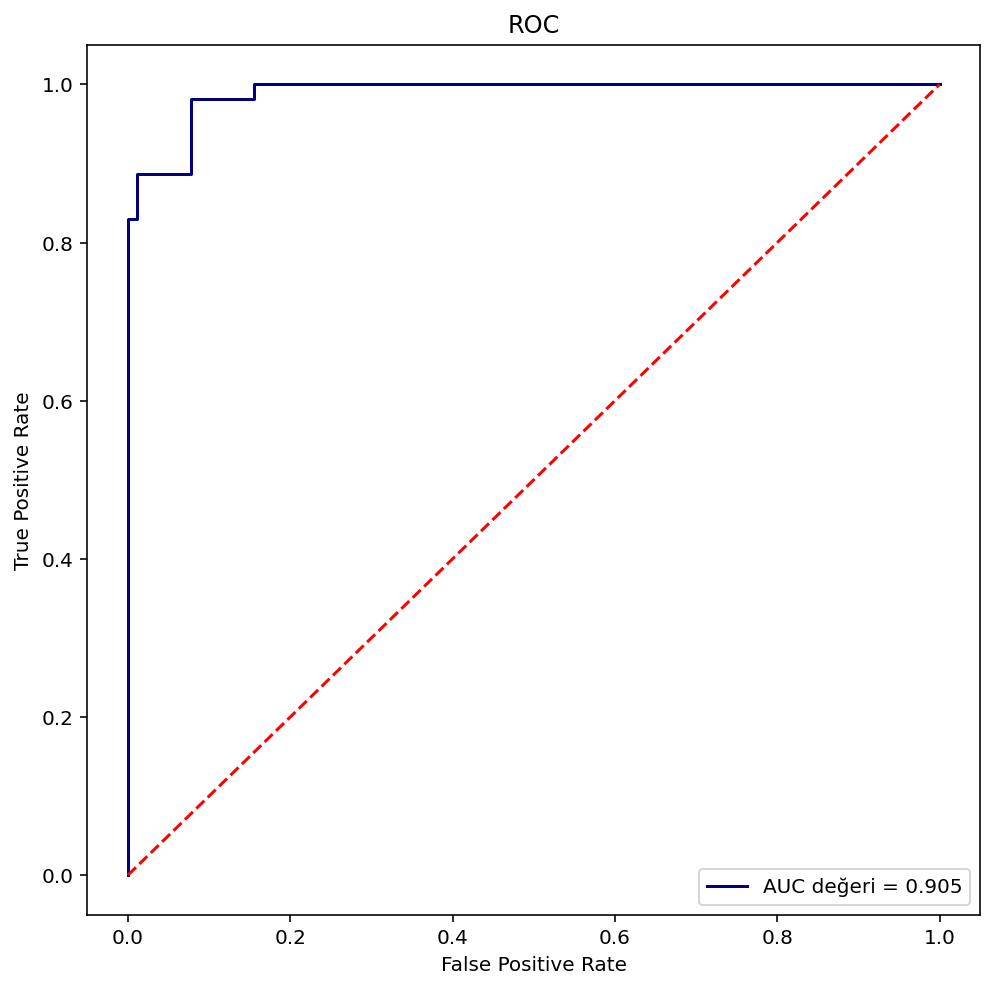

0.9045073375262055


In [ ]:
plt.figure(figsize=(8,8))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

roc_auc = roc_auc_score(Y_test, model[3].predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, model[3].predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='AUC değeri = %0.3f' % roc_auc, color='navy')
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()
print(roc_auc)

In [33]:
#Artificial Neural Network
import tensorflow as tf

import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
import keras

import numpy as np 

from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras import regularizers

import pandas as pd

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [ ]:
#Uploading dataset
upladed = files.upload()
df1 = pd.read_csv('X_data.csv')

upladed1 = files.upload()
df2 = pd.read_csv('Y_data.csv')

In [ ]:
#Splitting dataset for %75 training and %25 test 
df1 = preprocessing.scale(df1)
X_train, X_test, Y_train, Y_test = train_test_split(df1, df2, test_size = 0.25, random_state = 0)

In [ ]:
#Model description

model = Sequential()
model.add(Dense(13, input_shape = (30,), activation = 'relu')) #we have 30 feature so need 30 input neuron layer
model.add(Dense(1, activation = 'sigmoid'))#output layer
model.compile(loss = 'binary_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy'])

In [ ]:
#Used earlystopping function to prevent overfit and speed up the training process, Keras supports early stopping of training with a callback called EarlyStopping. This callback allows you to specify the performance metric to monitor, the trigger and, once triggered, it will stop the training process.
earlystopper = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 15, verbose = 1, mode = 'auto')
history = model.fit(X_train, Y_train, epochs = 3000, validation_split= 0.15, verbose = 0,
                    callbacks = [earlystopper])

history_dict = history.history

In [ ]:
#Training loss ve validation loss graph over epochs

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
plt.figure()
plt.figure()
plt.plot(loss_values, 'b', label = 'training loss')
plt.plot(val_loss_values, 'r', label = 'validation loss')
plt.title('Training loss ve Validation loss grafiği')
plt.legend()
plt.xlabel('Epochs')

In [ ]:
#Model accuracy over epochs
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']
plt.plot(val_accuracy_values, '-g', label = 'validation accuracy')
plt.plot(accuracy_values, '-r', label = 'accuracy')
plt.title('Model doğruluğu epoch grafiği')
plt.legend()

In [ ]:
#Calculation of test data and accuracy values
loss, acc = model.evaluate(X_test, Y_test)
print("Test Kaybı = ", loss)
print("Test Doğruluğu = ", acc)

In [ ]:
#AUC score and ROC curve in test set
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

Y_test_pred = model.predict_proba(X_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_test, Y_test_pred)
auc_keras = auc(fpr_keras, tpr_keras)
print('Test verisi AUC skoru: ', auc_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label = 'Keras (area = {:.3f})'.format(auc_keras))

plt.xlabel('False Pozitif Oranı')
plt.ylabel('True Pozitif Oranı')
plt.title('Test Setindeki ROC Eğrisi')
plt.legend(loc = 'best')
plt.show()

In [ ]:
#K-means
#Loading Data Set and Libraries
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('data.csv')



In [ ]:
#Preprocessing the data set
cols_drop = ['id', 'Unnamed: 32']
data = data.drop(cols_drop, axis=1)

data['diagnonis'] = data['diagnosis'].map({'M':1,'B':0})

X = data.drop('diagnosis', axis=1).values
X = StandardScaler().fit_transform(X)

In [ ]:
#Application of the kmeans algorithm to divide it into two sets
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, init="k-means++", n_init=10)
km_pred = km.fit_predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(X[:,0], X[:,1], c=data["diagnosis"], cmap="jet", edgecolor="None", alpha=0.35)
ax1.set_title("Asıl veriler")

ax2.scatter(X[:,0], X[:,1], c=km_pred, cmap="jet", edgecolor="None", alpha=0.35)
ax2.set_title("KMeans ile kümelenmiş veriler")